# Midterm 

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/wweissbluth/dan-midterm-repo/blob/main/midterm.ipynb)

In [1]:
import pandas as pd

# Load the Excel file into a dictionary of DataFrames
file_path = '/Users/warrenweissbluth/Documents/code_repos/dan-midterm-repo/UCS-Satellite-Database 5-1-2023.xlsx'
dfs = pd.read_excel(file_path, sheet_name=None)

# Load the first sheet of the Excel file into a DataFrame, ignoring columns with no data
df = pd.read_excel(file_path, sheet_name=0).dropna(axis=1, how='all')

# Display the first few rows of the DataFrame
display(df)


,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAC AIS-Sat1 (Kelpie 1),AAC AIS-Sat1 (Kelpie 1),United Kingdom,United Kingdom,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,Ziyuan 1-02C,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,Ziyuan 1-2D,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Convert 'Dry Mass (kg.)' column to numeric, coercing errors to NaN
df['Dry Mass (kg.)'] = pd.to_numeric(df['Dry Mass (kg.)'], errors='coerce')

# Calculate the number of rows before cleaning
initial_row_count = df.shape[0]

# Drop rows with NaN values in the 'Dry Mass (kg.)' column
df_clean = df.dropna(subset=['Dry Mass (kg.)'])

# Calculate the number of rows after cleaning
final_row_count = df_clean.shape[0]

# Calculate the total rows removed
rows_removed = initial_row_count - final_row_count

# Print the total rows removed and the total rows remaining
print(f'Total rows removed: {rows_removed}')
print(f'Total rows remaining: {final_row_count}')
print(f'Total rows: {initial_row_count}')

Total rows removed: 6796
Total rows remaining: 764
Total rows: 7560


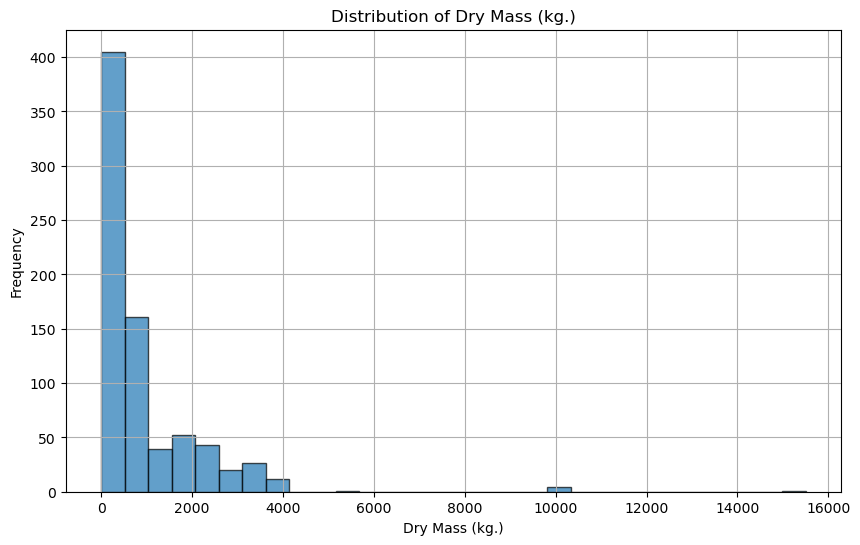

In [3]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Dry Mass (kg.)'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Dry Mass (kg.)')
plt.xlabel('Dry Mass (kg.)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
from sklearn.cluster import KMeans

# Select the 'Dry Mass (kg.)' column for clustering
X = df_clean[['Dry Mass (kg.)']]

# Initialize the KMeans algorithm with a specified number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the KMeans algorithm to the data
kmeans.fit(X)

# Add the cluster labels to the dataframe
df_clean.insert(0, 'Cluster', kmeans.labels_)

# Calculate the mean dry mass for each cluster
mean_dry_mass = df_clean.groupby('Cluster')['Dry Mass (kg.)'].mean()

# Sort clusters by mean mass
sorted_clusters = mean_dry_mass.sort_values().index
df_clean['Cluster'] = df_clean['Cluster'].apply(lambda x: sorted_clusters.get_loc(x))

# Map the clusters to light, medium, and heavy payloads
cluster_mapping = {0: 'Light Payload', 1: 'Medium Payload', 2: 'Heavy Payload'}
df_clean['Cluster'] = df_clean['Cluster'].map(cluster_mapping)

# Display the first few rows of the dataframe with the cluster labels
display(df_clean.head())

/var/folders/bh/bs5kljm140s_4k8bp_hzf8n00000gn/T/ipykernel_11373/1615962549.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = df_clean['Cluster'].apply(lambda x: sorted_clusters.get_loc(x))
/var/folders/bh/bs5kljm140s_4k8bp_hzf8n00000gn/T/ipykernel_11373/1615962549.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = df_clean['Cluster'].map(cluster_mapping)


,Cluster,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
1,Light Payload,AAC AIS-Sat1 (Kelpie 1),AAC AIS-Sat1 (Kelpie 1),United Kingdom,United Kingdom,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Medium Payload,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",ABS-4,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Medium Payload,"ABS-6 (ABS-1, LMI-1, Lockheed Martin-Intersput...",ABS-6,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Light Payload,ADLER-2,ADLER-2,NR (9/23),Austria,Austrian Space Forum (OEWF)/Spire,Civil,Earth Science,NaN,LEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Medium Payload,"Afghansat-1 (Eutelsat 48D [Eutelsat 48B, Eutel...",Eutelsat 48D,France,Multinational,EUTELSAT S.A.,Commercial,Communications,NaN,GEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/bh/bs5kljm140s_4k8bp_hzf8n00000gn/T/ipykernel_11373/4228563181.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Cluster', y='Dry Mass (kg.)', palette='viridis', ax=ax)


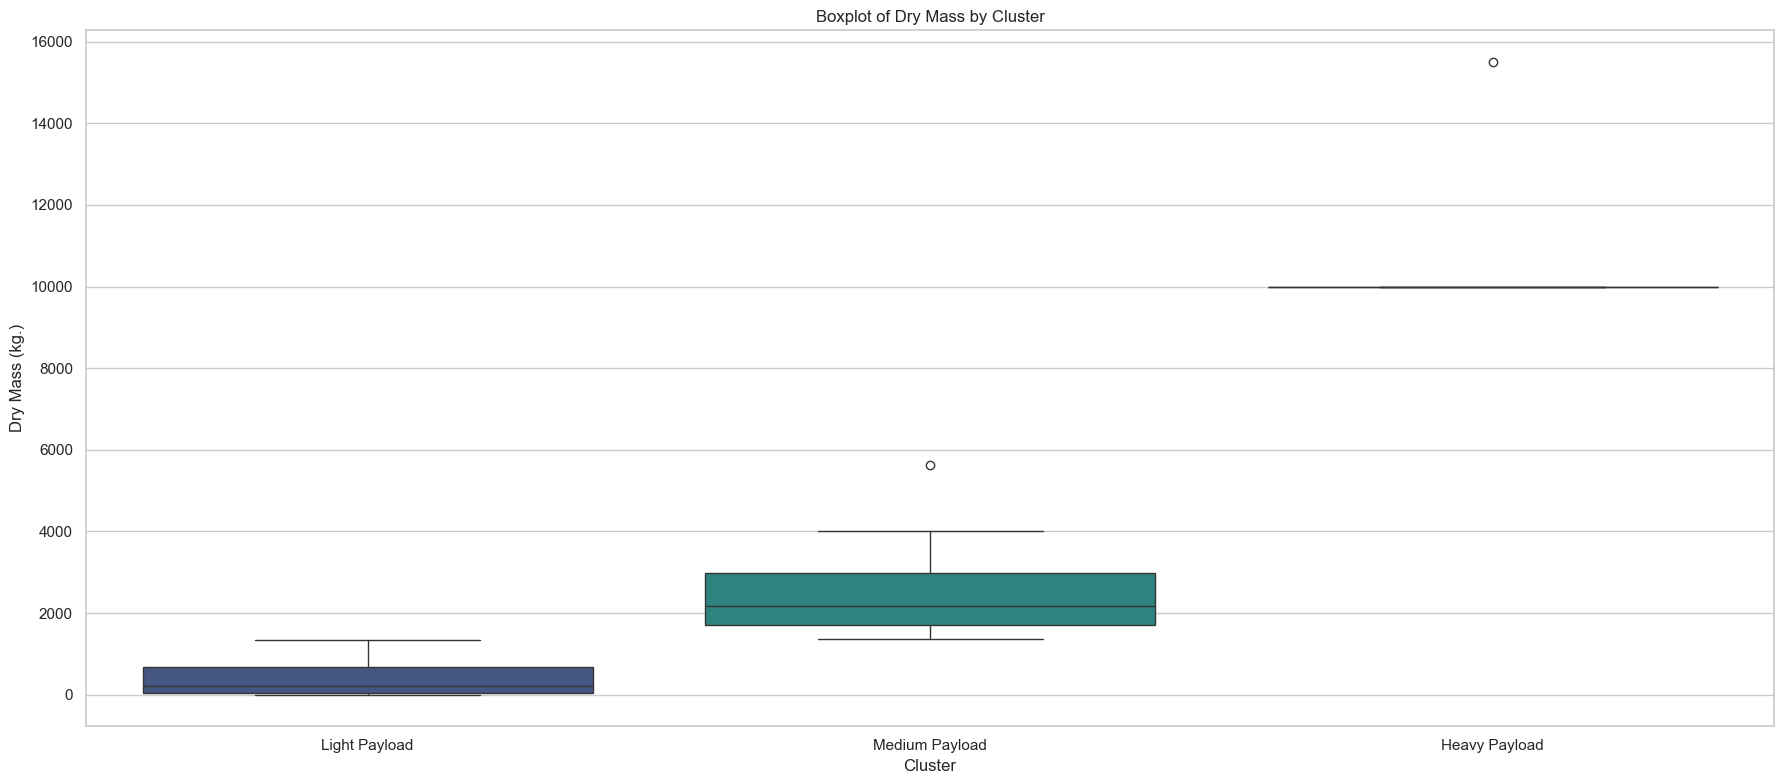

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(18, 8))

# Plot the whisker chart (boxplot)
sns.boxplot(data=df_clean, x='Cluster', y='Dry Mass (kg.)', palette='viridis', ax=ax)
ax.set_title('Boxplot of Dry Mass by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Dry Mass (kg.)')

# Show the plot
plt.tight_layout()
plt.show()


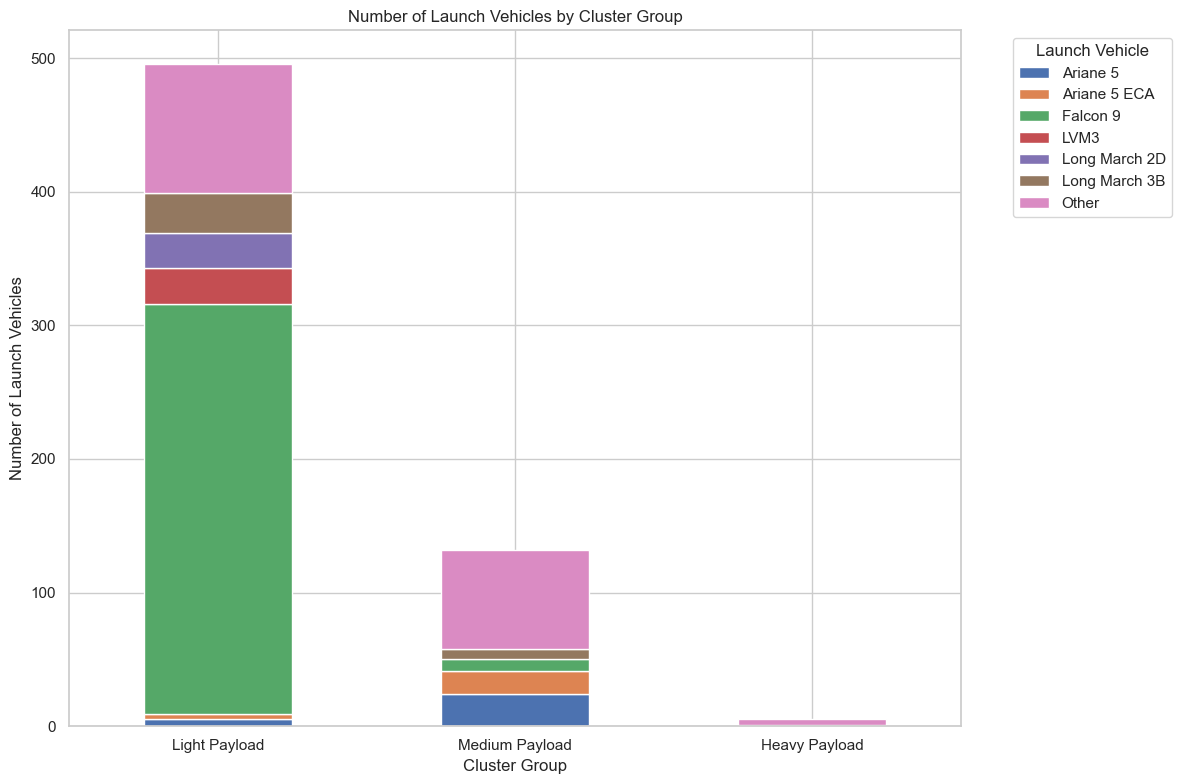

In [6]:
import matplotlib.pyplot as plt

# Group by 'Cluster' and 'Launch Vehicle', and count the occurrences
launch_vehicle_counts = df_clean.groupby(['Cluster', 'Launch Vehicle']).size().unstack(fill_value=0)

# Combine launch vehicles with less than 10 occurrences into 'Other'
launch_vehicle_counts['Other'] = launch_vehicle_counts.loc[:, launch_vehicle_counts.sum() < 10].sum(axis=1)
launch_vehicle_counts = launch_vehicle_counts.loc[:, launch_vehicle_counts.sum() >= 20]
launch_vehicle_counts['Other'] = launch_vehicle_counts['Other']

# Reorder the clusters
launch_vehicle_counts = launch_vehicle_counts.loc[['Light Payload', 'Medium Payload', 'Heavy Payload']]

# Plot the stacked bar chart
ax = launch_vehicle_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Number of Launch Vehicles by Cluster Group')
plt.xlabel('Cluster Group')
plt.ylabel('Number of Launch Vehicles')
plt.legend(title='Launch Vehicle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
# Group by 'Cluster' and get summary statistics for 'Dry Mass (kg.)'
cluster_summary = df_clean.groupby('Cluster')['Dry Mass (kg.)'].describe()

# Display the summary statistics
display(cluster_summary)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Heavy Payload,5.0,11100.000000,2459.674775,10000.0,10000.0,10000.0,10000.0,15500.0
Light Payload,578.0,327.044118,324.587508,1.0,50.0,221.0,678.0,1330.0
Medium Payload,181.0,2378.082873,787.283260,1375.0,1700.0,2180.0,2975.0,5624.0


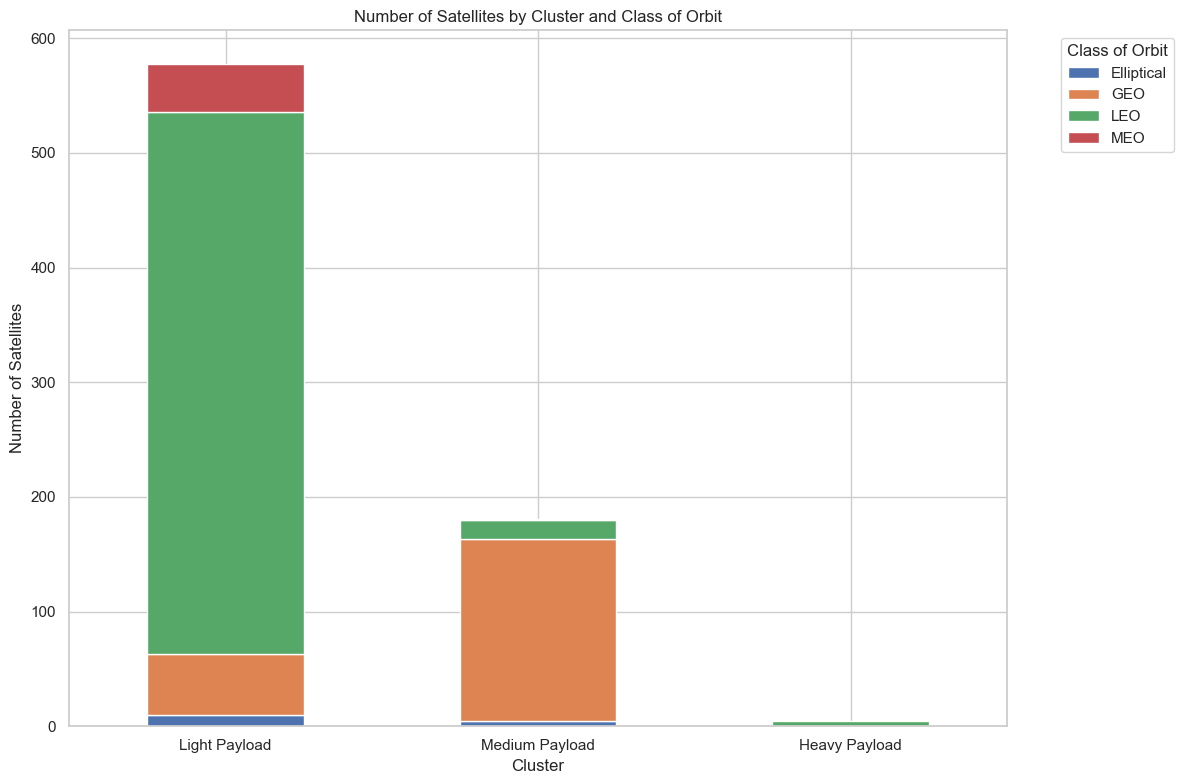

In [8]:
# Group by 'Cluster' and 'Class of Orbit', and count the occurrences
orbit_class_counts = df_clean.groupby(['Cluster', 'Class of Orbit']).size().unstack(fill_value=0)
orbit_class_counts = orbit_class_counts.loc[['Light Payload', 'Medium Payload', 'Heavy Payload']]

# Plot the stacked bar chart
ax = orbit_class_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Number of Satellites by Cluster and Class of Orbit')
plt.xlabel('Cluster')
plt.ylabel('Number of Satellites')
plt.legend(title='Class of Orbit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
import plotly.express as px

# Prepare the data for the Sunburst plot
sunburst_data = df_clean[['Country of Operator/Owner', 'Users', 'Purpose']]

# Generate the Sunburst plot
fig = px.sunburst(
    sunburst_data,
    path=['Country of Operator/Owner', 'Users', 'Purpose'],
    title='Sunburst Plot of Country of Operator/Owner, Users, and Purpose'
)

# Show the plot
fig.show()

In [10]:
import plotly.express as px

# Group and count the occurrences of 'Country of Operator/Owner'
pie_data = df_clean['Country of Operator/Owner'].value_counts().reset_index()
pie_data.columns = ['Country of Operator/Owner', 'Count']

# Calculate the threshold for 2% of the total
threshold = 0.02 * pie_data['Count'].sum()

# Group together countries with less than 2% of the total
pie_data['Country of Operator/Owner'] = pie_data['Country of Operator/Owner'].where(pie_data['Count'] >= threshold, 'Other')

# Aggregate the counts for the grouped data
pie_data = pie_data.groupby('Country of Operator/Owner').sum().reset_index()

# Generate the pie chart
fig = px.pie(
    pie_data,
    names='Country of Operator/Owner',
    values='Count',
    title='Pie Chart of Country of Operator/Owner'
)

# Show the plot
fig.show()

/var/folders/bh/bs5kljm140s_4k8bp_hzf8n00000gn/T/ipykernel_11373/1907393946.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bh/bs5kljm140s_4k8bp_hzf8n00000gn/T/ipykernel_11373/1907393946.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



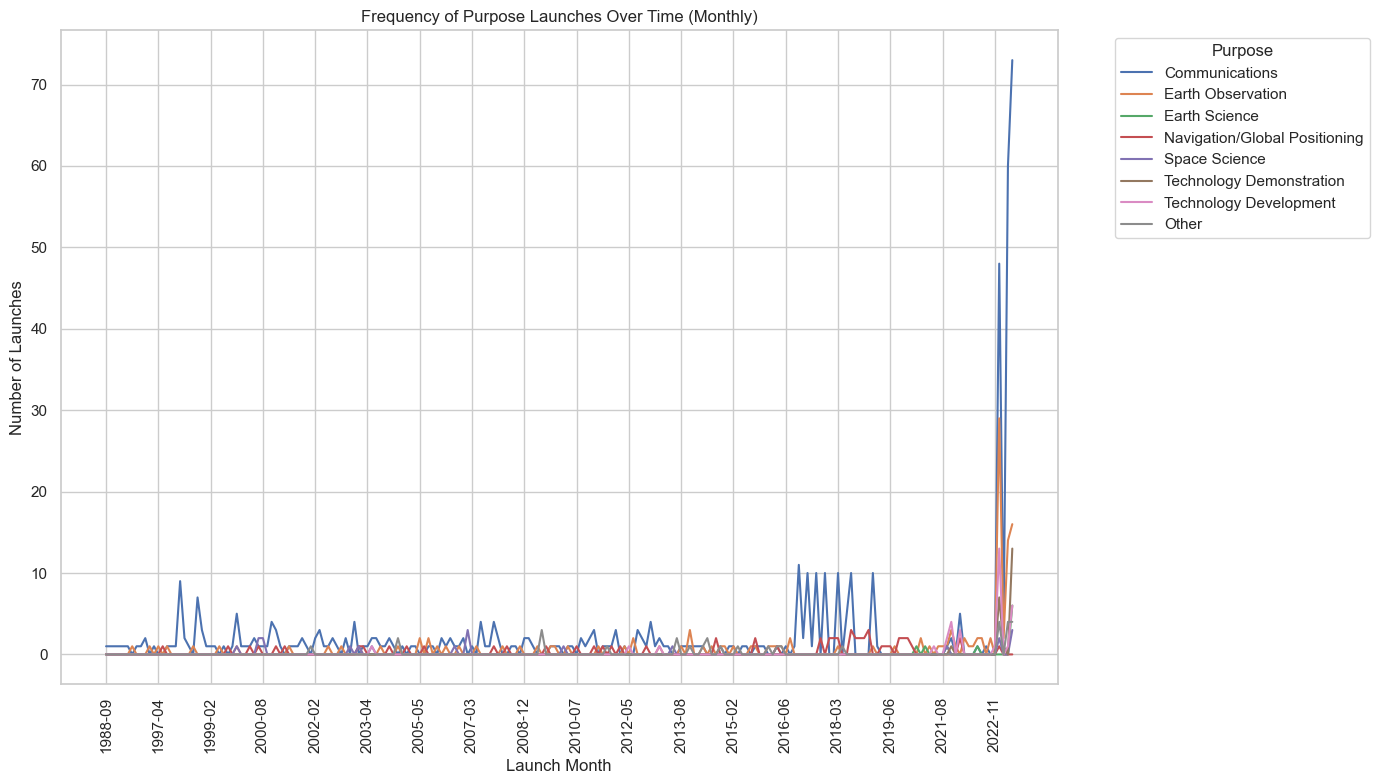

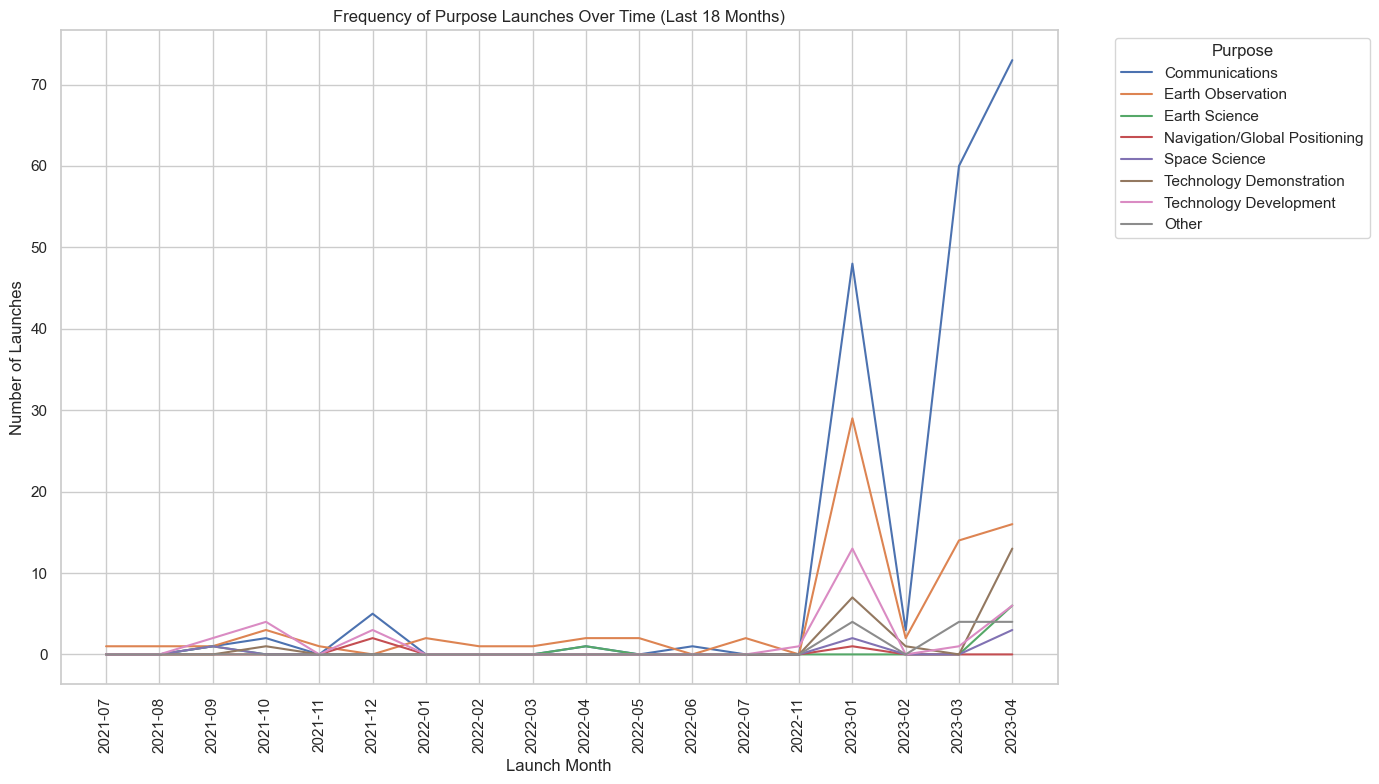

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date of Launch' column to datetime format, coercing errors to NaT
df_clean['Date of Launch'] = pd.to_datetime(df_clean['Date of Launch'], errors='coerce')

# Extract the month and year from the 'Date of Launch' column
df_clean['Launch Month'] = df_clean['Date of Launch'].dt.to_period('M')

# Group the data by 'Purpose' and 'Launch Month' to count the number of launches per month
launch_counts = df_clean.groupby(['Launch Month', 'Purpose']).size().unstack(fill_value=0)

# Calculate the threshold for grouping purposes
threshold = 10  # You can change this to 20 if needed

# Group purposes with less than the threshold into 'Other'
purpose_counts = launch_counts.sum(axis=0)
filtered_purposes = purpose_counts[purpose_counts >= threshold].index
launch_counts['Other'] = launch_counts.loc[:, ~launch_counts.columns.isin(filtered_purposes)].sum(axis=1)
launch_counts = launch_counts.loc[:, launch_counts.columns.isin(filtered_purposes) | (launch_counts.columns == 'Other')]

# Plot the line chart
plt.figure(figsize=(14, 8))
for purpose in launch_counts.columns:
    plt.plot(launch_counts.index.astype(str), launch_counts[purpose], label=purpose)

plt.title('Frequency of Purpose Launches Over Time (Monthly)')
plt.xlabel('Launch Month')
plt.ylabel('Number of Launches')
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')

# Simplify the x-axis
plt.xticks(ticks=range(0, len(launch_counts.index), 12), labels=launch_counts.index[::12].astype(str), rotation=90)

plt.tight_layout()
plt.show()

# Plot the line chart for the last 18 months
last_18_months_purpose = launch_counts.loc[launch_counts.index[-18:]]

plt.figure(figsize=(14, 8))
for purpose in last_18_months_purpose.columns:
    plt.plot(last_18_months_purpose.index.astype(str), last_18_months_purpose[purpose], label=purpose)

plt.title('Frequency of Purpose Launches Over Time (Last 18 Months)')
plt.xlabel('Launch Month')
plt.ylabel('Number of Launches')
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')

# Simplify the x-axis
plt.xticks(ticks=range(0, len(last_18_months_purpose.index), 1), labels=last_18_months_purpose.index.astype(str), rotation=90)

plt.tight_layout()
plt.show()

In [12]:
#

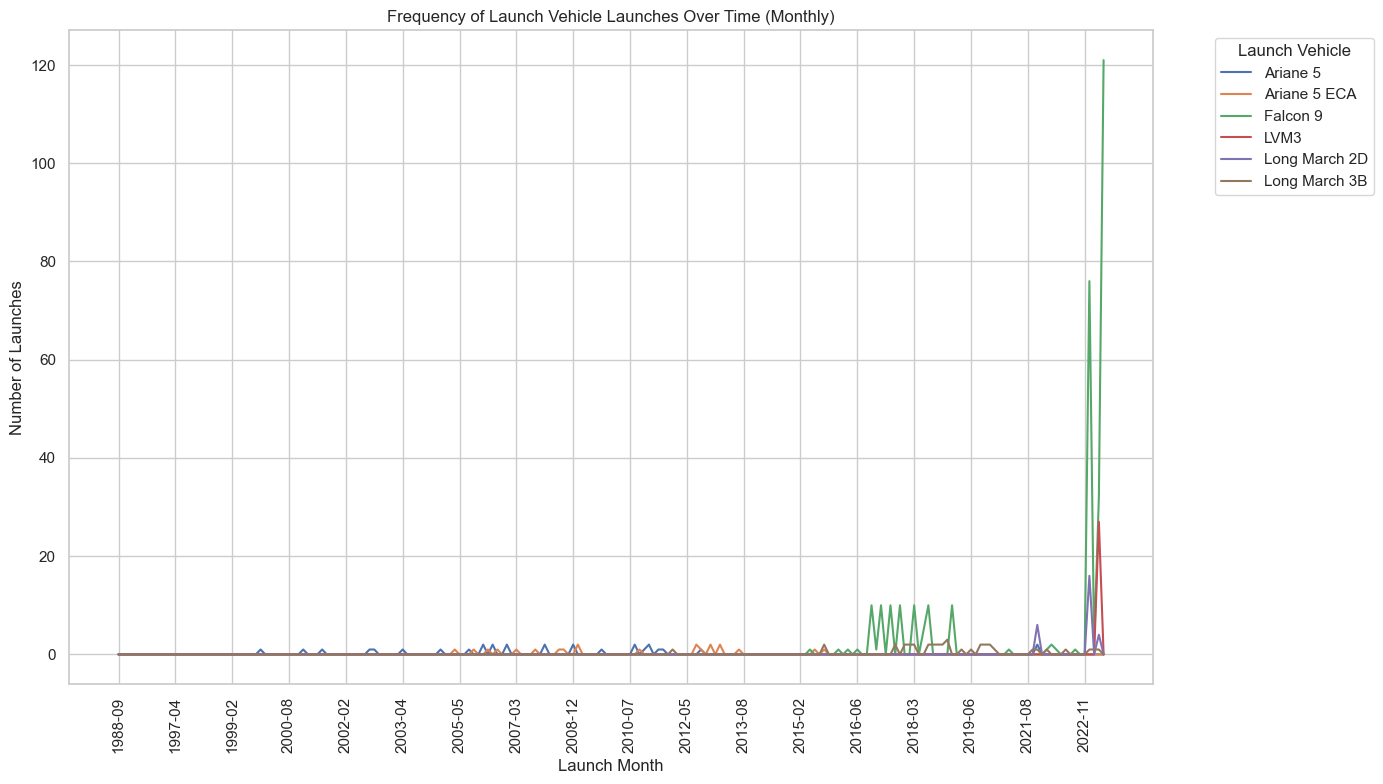

In [13]:
# Extract the launch vehicle names from the cluster bar chart legend
launch_vehicles = ['Ariane 5', 'Ariane 5 ECA', 'Falcon 9', 'LVM3', 'Long March 2D', 'Long March 3B']

# Initialize an empty DataFrame to store the launch counts over time
launch_vehicle_time_series = pd.DataFrame(index=launch_counts.index)

# Populate the DataFrame with the counts of each launch vehicle over time
for vehicle in launch_vehicles:
    launch_vehicle_time_series[vehicle] = df_clean[df_clean['Launch Vehicle'] == vehicle].groupby('Launch Month').size()

# Fill NaN values with 0
launch_vehicle_time_series = launch_vehicle_time_series.fillna(0)

# Plot the line chart
plt.figure(figsize=(14, 8))
for vehicle in launch_vehicles:
    plt.plot(launch_vehicle_time_series.index.astype(str), launch_vehicle_time_series[vehicle], label=vehicle)

plt.title('Frequency of Launch Vehicle Launches Over Time (Monthly)')
plt.xlabel('Launch Month')
plt.ylabel('Number of Launches')
plt.legend(title='Launch Vehicle', bbox_to_anchor=(1.05, 1), loc='upper left')

# Simplify the x-axis
plt.xticks(ticks=range(0, len(launch_vehicle_time_series.index), 12), labels=launch_vehicle_time_series.index[::12].astype(str), rotation=90)

plt.tight_layout()
plt.show()

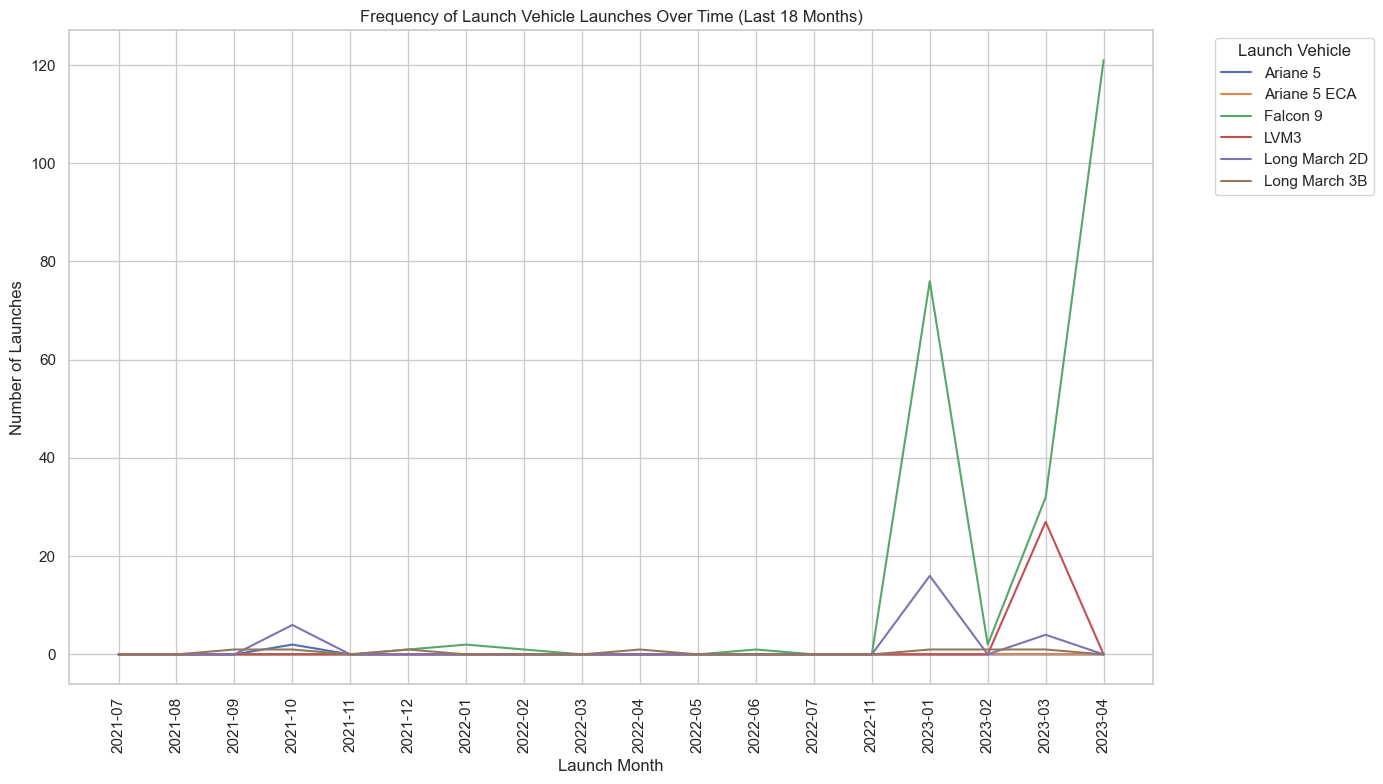

In [14]:
# Filter the DataFrame to include only the last 18 months
last_18_months = launch_vehicle_time_series.loc[launch_vehicle_time_series.index[-18:]]

# Plot the line chart for the last 18 months
plt.figure(figsize=(14, 8))
for vehicle in launch_vehicles:
    plt.plot(last_18_months.index.astype(str), last_18_months[vehicle], label=vehicle)

plt.title('Frequency of Launch Vehicle Launches Over Time (Last 18 Months)')
plt.xlabel('Launch Month')
plt.ylabel('Number of Launches')
plt.legend(title='Launch Vehicle', bbox_to_anchor=(1.05, 1), loc='upper left')

# Simplify the x-axis
plt.xticks(ticks=range(0, len(last_18_months.index), 1), labels=last_18_months.index.astype(str), rotation=90)

plt.tight_layout()
plt.show()

In [15]:
import plotly.express as px

# Group and count the occurrences of 'Users'
user_pie_data = df_clean['Users'].value_counts().reset_index()
user_pie_data.columns = ['Users', 'Count']

# Calculate the threshold for 2% of the total
user_threshold = 0.02 * user_pie_data['Count'].sum()

# Group together users with less than 2% of the total
user_pie_data['Users'] = user_pie_data['Users'].where(user_pie_data['Count'] >= user_threshold, 'Other')

# Aggregate the counts for the grouped data
user_pie_data = user_pie_data.groupby('Users').sum().reset_index()

# Generate the pie chart for Users
fig_user = px.pie(
    user_pie_data,
    names='Users',
    values='Count',
    title='Pie Chart of Users'
)

# Show the plot for Users
fig_user.show()

# Group and count the occurrences of 'Purpose'
purpose_pie_data = df_clean['Purpose'].value_counts().reset_index()
purpose_pie_data.columns = ['Purpose', 'Count']

# Calculate the threshold for 2% of the total
purpose_threshold = 0.02 * purpose_pie_data['Count'].sum()

# Group together purposes with less than 2% of the total
purpose_pie_data['Purpose'] = purpose_pie_data['Purpose'].where(purpose_pie_data['Count'] >= purpose_threshold, 'Other')

# Aggregate the counts for the grouped data
purpose_pie_data = purpose_pie_data.groupby('Purpose').sum().reset_index()

# Generate the pie chart for Purpose
fig_purpose = px.pie(
    purpose_pie_data,
    names='Purpose',
    values='Count',
    title='Pie Chart of Purpose'
)

# Show the plot for Purpose
fig_purpose.show()